In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


age: the age of the patient in years.

sex: the sex of the patient (1 = male, 0 = female).

cp: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: the resting blood pressure of the patient in mm Hg.

chol: the serum cholesterol level of the patient in mg/dl.

fbs: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

restecg: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

thalach: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

oldpeak: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

ca: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

thal: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [ ]:
# EDA - info,describe, corr, shape, isnull
# null value analysis - drop/impute
# outlier detection
# feature selection

# supervised learning - split the data
# build dummy model
# train the model
# test model
# evaluate the performance of model


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3134ca8d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3134ca8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3134ca9330>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3134cabc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3134ca9ae0>],
 'means': []}

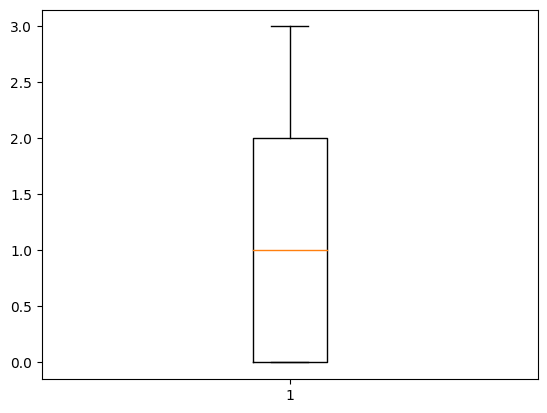

In [ ]:
#outliers detection
plt.boxplot(df['cp'])

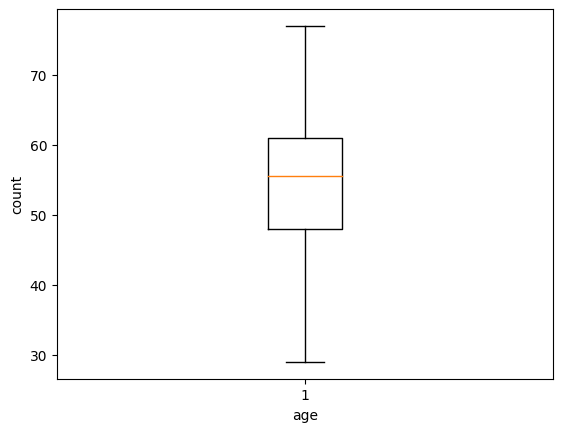

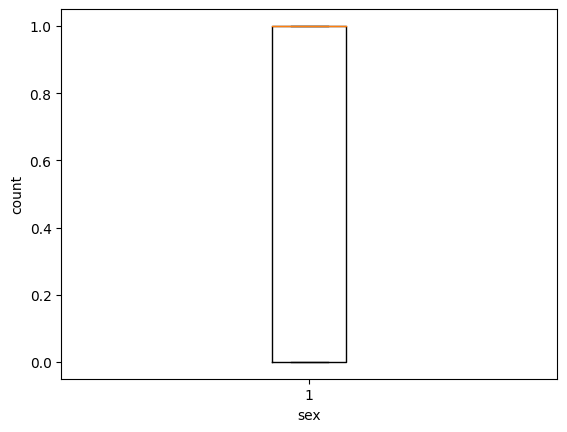

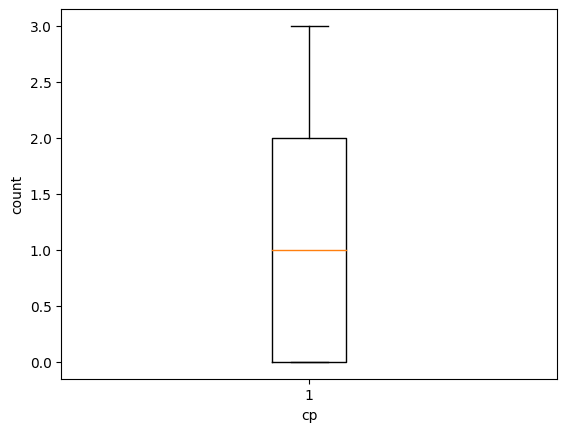

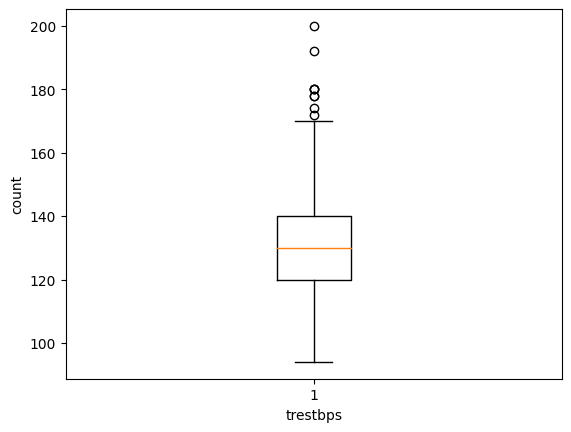

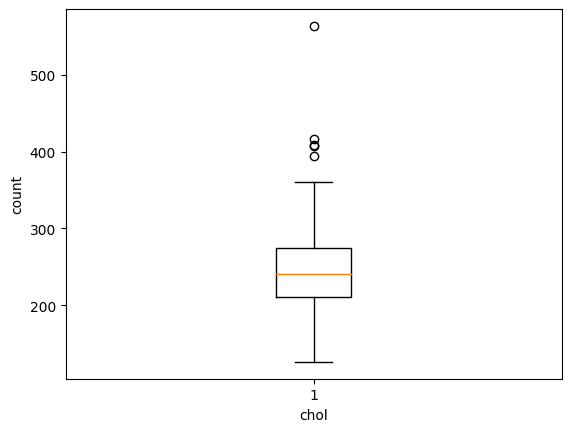

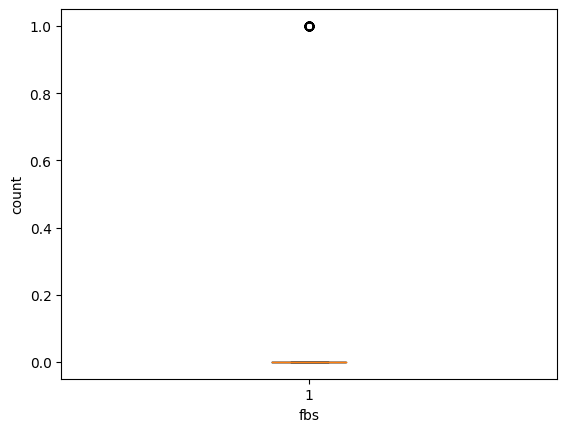

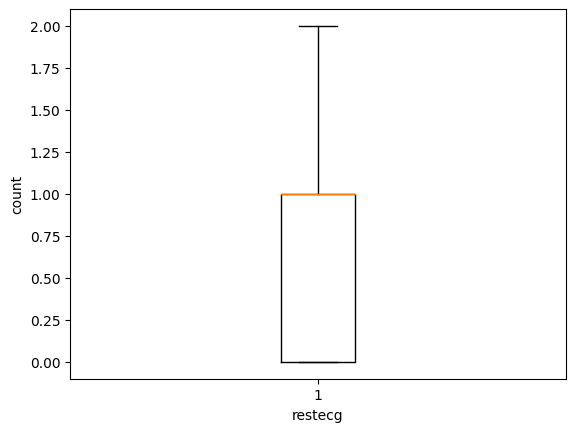

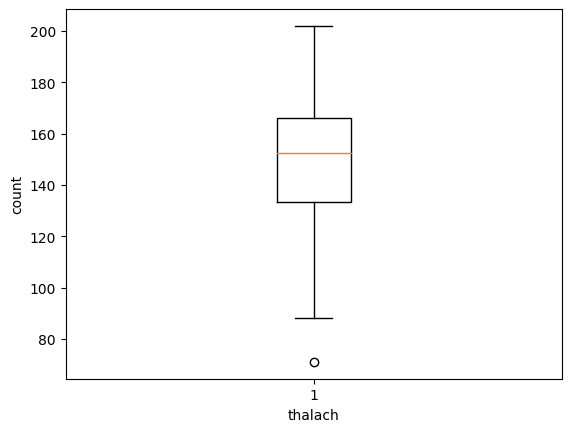

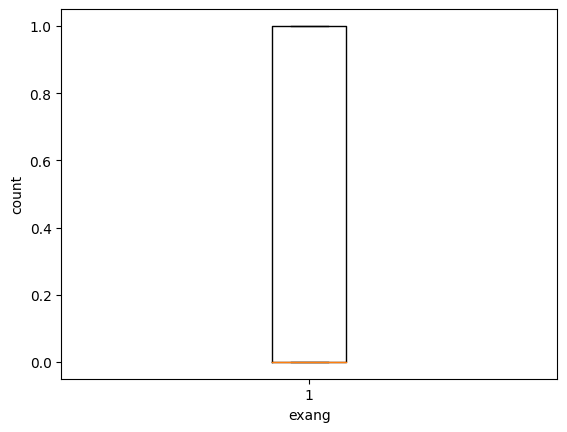

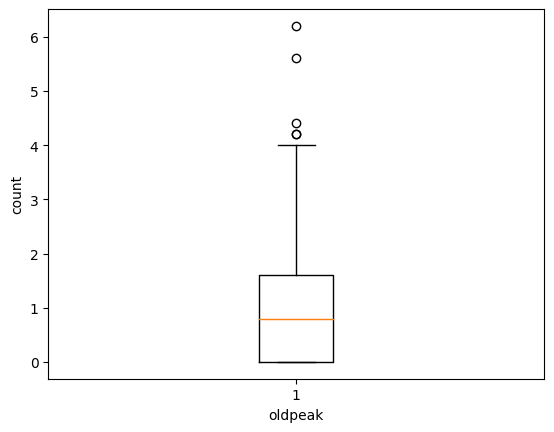

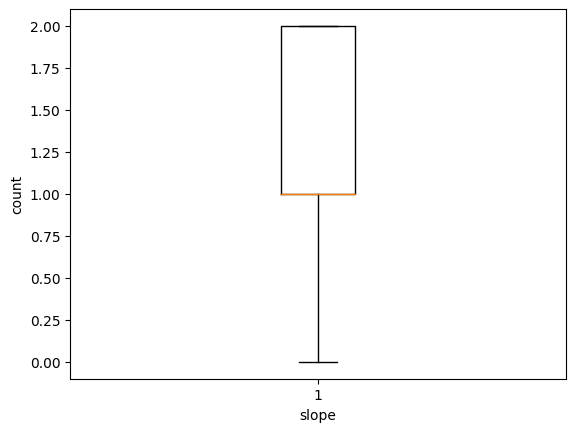

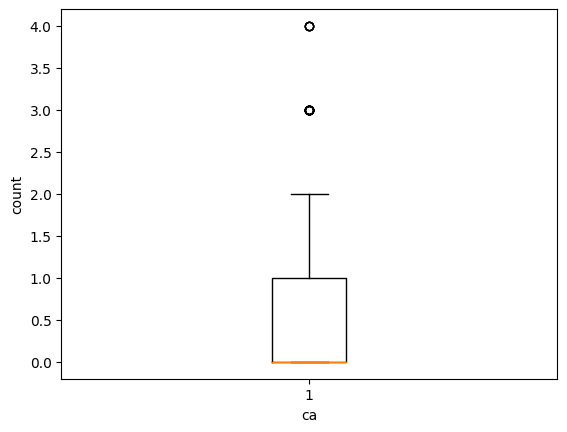

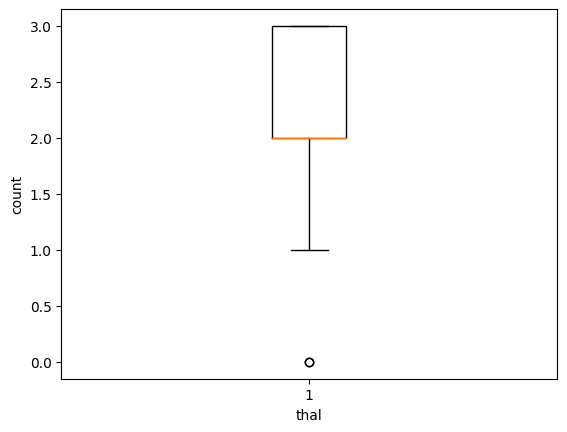

In [ ]:
for i in df.columns:
    if ((df[i].dtype != "object") & (i != "target")):

        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
out_col = ["trestbps","chol","thalach","oldpeak"]

In [ ]:
for i in out_col:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    df = df[(df[i]<=upper) & (df[i]>=lower)]

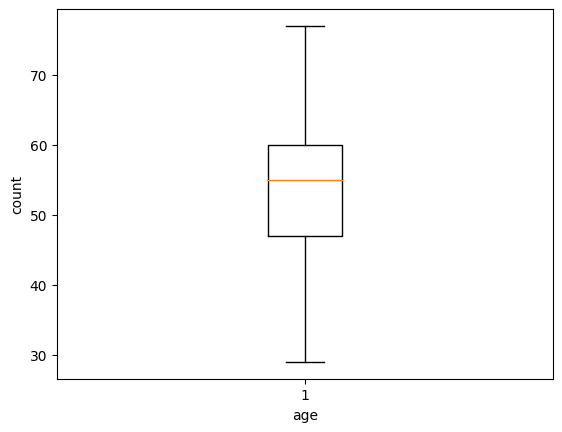

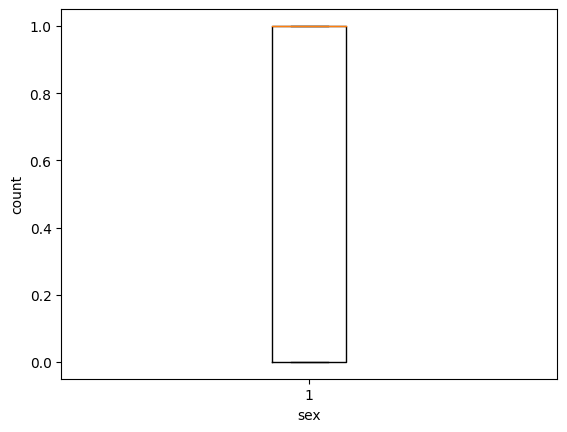

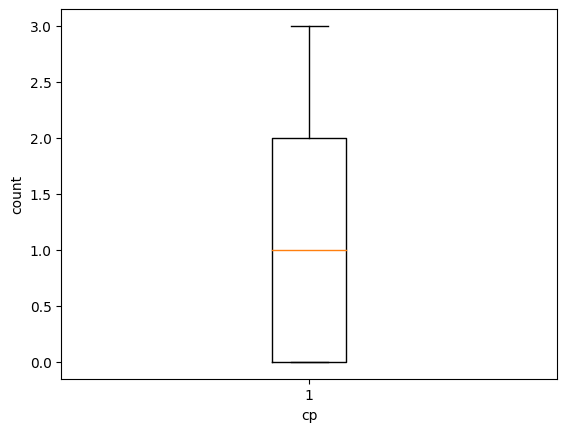

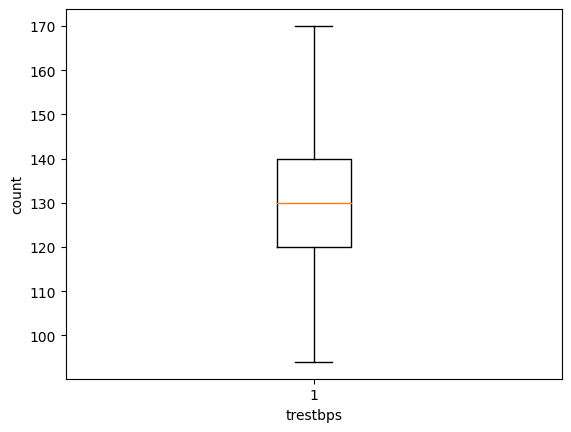

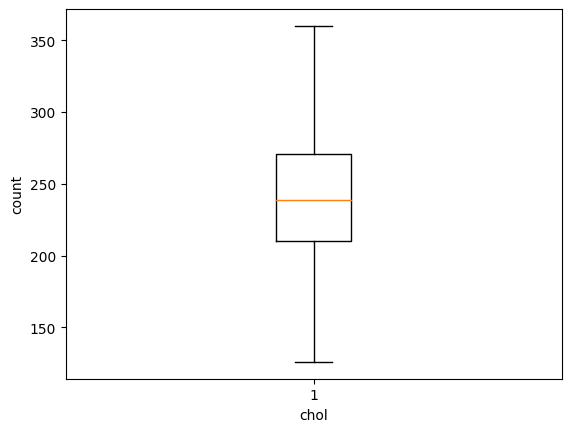

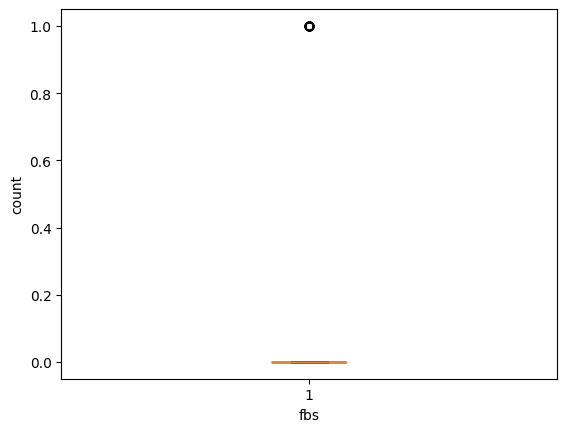

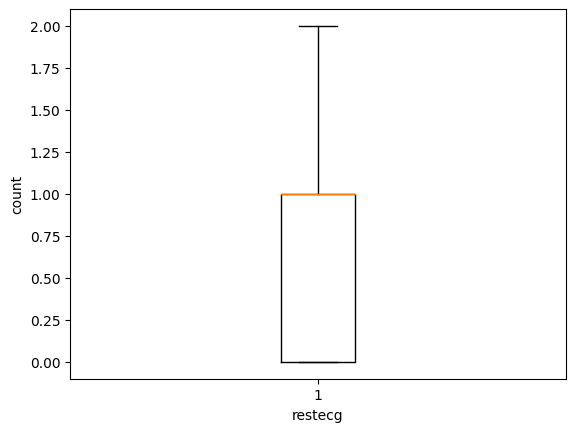

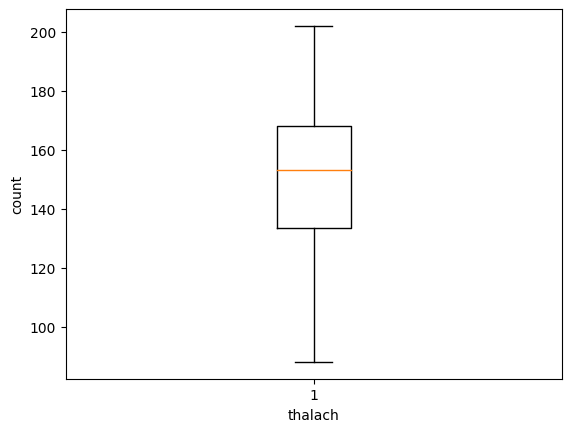

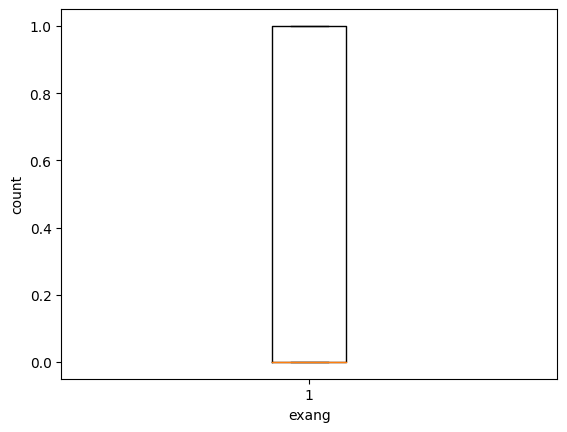

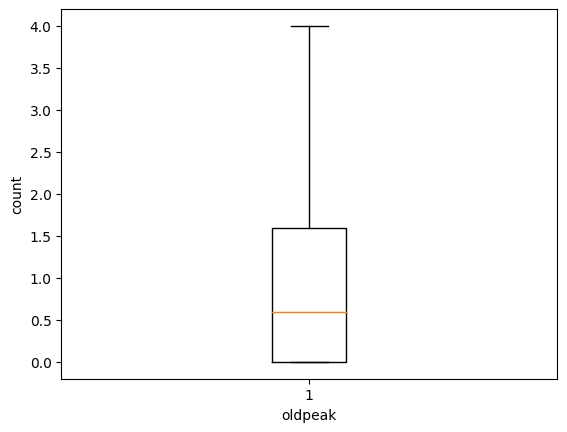

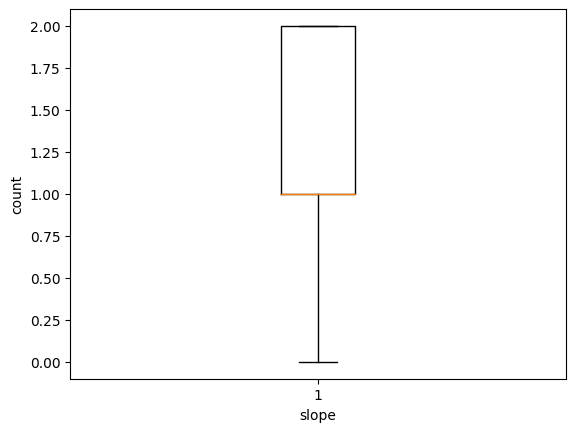

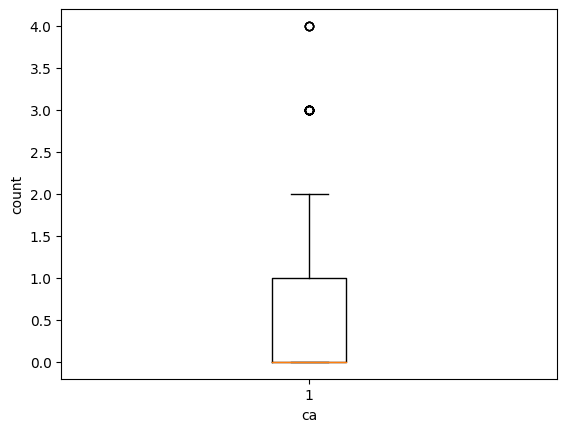

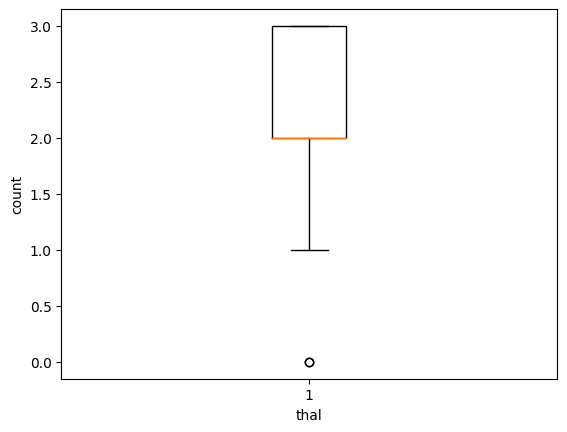

In [ ]:
for i in df.columns:
    if ((df[i].dtype != "object") & (i != "target")):

        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [ ]:
# spliting the data into dependent and independent
x = df.iloc[:, :-1] #considering all the columns from the df except the last one
y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [ ]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()  #dummy model

In [ ]:
dt = dt.fit(x_train, y_train) #training

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
y_test

80     1
300    0
296    0
230    0
267    0
      ..
233    0
53     1
91     1
131    1
157    1
Name: target, Length: 85, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_pred, y_test)

0.8

In [ ]:
confusion_matrix(y_pred, y_test)

array([[33, 12],
       [ 5, 35]])

In [ ]:
# Hyperparameter Tuning
#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree classifier
dt = DecisionTreeClassifier() #base model

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)  # X and y are your training data and labels

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [ ]:
# Retrieve the best hyperparameters and model
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_
print(best_dt)
print(best_params)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=20)
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 20}


In [ ]:
# Use the best model for predictions or further analysis
predictions = best_dt.predict(x_test)

In [ ]:
accuracy_score(predictions, y_test )

0.8352941176470589